In [13]:
# Autoencoder
import tensorflow as tf
import tensorflow.contrib.layers as lays 
import numpy as np
from skimage import transform
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
    

In [2]:
# Under Complete Autoencoder

def autoencoder(inputs):
    # Encoder 
    # 32 x 32 x 1   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  8 x 8 x 16
    # 8 x 8 x 16    -> 2 x 2 x 8 
    net = lays.conv2d(inputs, 32, [5, 5], stride = 2, padding = 'SAME')
    net = lays.conv2d(net, 16, [5, 5], stride = 2, padding = 'SAME')
    net = lays.conv2d(net, 8, [5, 5], stride = 2, padding = 'SAME')
    
    # Decoder
    # 2 x 2 x 8    ->   8 x 8 x 16
    # 8 x 8 x 16   ->  16 x 16 x 32
    # 16 x 16 x 32 ->  32 x 32 x 1
    net = lays.conv2d_transpose(net, 16, [5, 5], stride = 2, padding = 'SAME')
    net = lays.conv2d_transpose(net, 32, [5, 5], stride = 2, padding = 'SAME')
    net = lays.conv2d_transpose(net, 1, [5, 5], stride = 2, padding = 'SAME', activation_fn = tf.nn.relu)
    return net

In [9]:
def resize_image_batch(imgs):
    # A function to resize the image to 32x32x1
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs

In [6]:
# Input to the networks (MNIST images)
ae_inputs = tf.placeholder(tf.float32, (None, 32, 32, 1))
# Create the Autoencoder network
ae_outputs = autoencoder(ae_inputs)
lr = 0.001
# Calculate the loss and optimize the network
loss = tf.reduce_mean(tf.square(ae_outputs - ae_inputs))
train_op = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)

# Intialize the network 
init = tf.global_variables_initializer()

In [14]:
batch_size = 500
epoch_num = 5

# Read MNIST dataset
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

# calculate the number of batch per epoch
batch_per_ep = mnist.train.num_examples // batch_size

with tf.Session() as sess:
    sess.run(init)
    for ep in range(epoch_num):
        for batch_n in range(batch_per_ep): # batches loop
            batch_img, batch_label = mnist.train.next_batch(batch_size) # read a batch
            batch_img = batch_img.reshape((-1, 28, 28, 1))              # Reshape each sample to an (28, 28, 1)
            batch_img = resize_image_batch(batch_img)
            _, c = sess.run([train_op, loss], feed_dict = {ae_inputs: batch_img})
            print("Epoch: {} - cost = {:.5f}" .format((ep+1), c))
            
    # test the trained network
    batch_img, batch_label = mnist.test.next_batch(50)
    batch_img = resize_image_batch(batch_img)
    recon_img = sess.run([ae_outputs], feed_dict = {ae_inputs: batch_img})[0]
    

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


C:\Users\Akshath\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Epoch: 1 - cost = 0.09915
Epoch: 1 - cost = 0.09872
Epoch: 1 - cost = 0.09931
Epoch: 1 - cost = 0.09456
Epoch: 1 - cost = 0.09581
Epoch: 1 - cost = 0.09086
Epoch: 1 - cost = 0.08639
Epoch: 1 - cost = 0.07882
Epoch: 1 - cost = 0.07347
Epoch: 1 - cost = 0.07548
Epoch: 1 - cost = 0.07827
Epoch: 1 - cost = 0.07469
Epoch: 1 - cost = 0.07013
Epoch: 1 - cost = 0.06745
Epoch: 1 - cost = 0.06979
Epoch: 1 - cost = 0.06887
Epoch: 1 - cost = 0.07145
Epoch: 1 - cost = 0.06687
Epoch: 1 - cost = 0.06544
Epoch: 1 - cost = 0.06599
Epoch: 1 - cost = 0.06484
Epoch: 1 - cost = 0.06451
Epoch: 1 - cost = 0.06437
Epoch: 1 - cost = 0.06277
Epoch: 1 - cost = 0.06131
Epoch: 1 - cost = 0.06025
Epoch: 1 - cost = 0.05959
Epoch: 1 - cost = 0.05867
Epoch: 1 - cost = 0.05780
Epoch: 1 - cost = 0.05735
Epoch: 1 - cost = 0.05593
Epoch: 1 - cost = 0.05473
Epoch: 1 - cost = 0.05546
Epoch: 1 - cost = 0.05446
Epoch: 1 - cost = 0.05247
Epoch: 1 - cost = 0.05276
Epoch: 1 - cost = 0.05219
Epoch: 1 - cost = 0.05051
Epoch: 1 - c

Epoch: 3 - cost = 0.00573
Epoch: 3 - cost = 0.00531
Epoch: 3 - cost = 0.00559
Epoch: 3 - cost = 0.00551
Epoch: 3 - cost = 0.00542
Epoch: 3 - cost = 0.00567
Epoch: 3 - cost = 0.00555
Epoch: 3 - cost = 0.00534
Epoch: 3 - cost = 0.00542
Epoch: 3 - cost = 0.00538
Epoch: 3 - cost = 0.00544
Epoch: 3 - cost = 0.00562
Epoch: 3 - cost = 0.00534
Epoch: 3 - cost = 0.00546
Epoch: 4 - cost = 0.00544
Epoch: 4 - cost = 0.00536
Epoch: 4 - cost = 0.00530
Epoch: 4 - cost = 0.00546
Epoch: 4 - cost = 0.00542
Epoch: 4 - cost = 0.00554
Epoch: 4 - cost = 0.00538
Epoch: 4 - cost = 0.00534
Epoch: 4 - cost = 0.00527
Epoch: 4 - cost = 0.00521
Epoch: 4 - cost = 0.00496
Epoch: 4 - cost = 0.00504
Epoch: 4 - cost = 0.00532
Epoch: 4 - cost = 0.00520
Epoch: 4 - cost = 0.00509
Epoch: 4 - cost = 0.00524
Epoch: 4 - cost = 0.00512
Epoch: 4 - cost = 0.00515
Epoch: 4 - cost = 0.00504
Epoch: 4 - cost = 0.00526
Epoch: 4 - cost = 0.00511
Epoch: 4 - cost = 0.00515
Epoch: 4 - cost = 0.00518
Epoch: 4 - cost = 0.00502
Epoch: 4 - c

AttributeError: module 'matplotlib.pyplot' has no attribute 'titile'

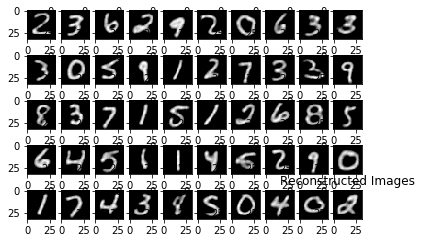

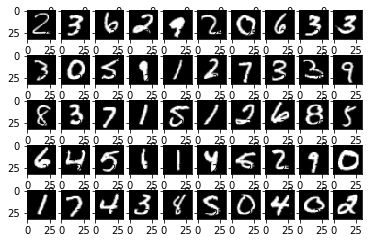

In [16]:
# Plot the reconstructed images and their ground truths (inputs)"
plt.figure(1)
plt.title('Reconstructed Images')
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(recon_img[i, ..., 0], cmap = 'gray')
plt.figure(2)
plt.title('Input Images')
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(batch_img[i, ..., 0], cmap = 'gray')
plt.show()